In [2]:
"""1. Uruchom poniższy fragment kodu, aby przygotować dane do rysowania wykresu (wszystkie zastosowane
polecenia powinny Ci już być na tym etapie znane):
 import pandas as pd
 import numpy as np
 import matplotlib as plt
 %matplotlib inline
 marathon = pd.read_csv("./marathon_results_2017.csv", usecols=["Age","M
/F","Country","40K"])
 marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(
x).total_seconds())
 marathon.head(5)"""

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
marathon = pd.read_csv("/Users/kamilw/Desktop/Moje/PythonLearing/Pandas_Udemy/course-files/marathon_results_2017.csv", usecols=["Age","M/F","Country","40K"])
marathon["TimeSeconds"] = marathon["40K"].apply(lambda x: pd.Timedelta(x).total_seconds())
marathon.head(5)

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


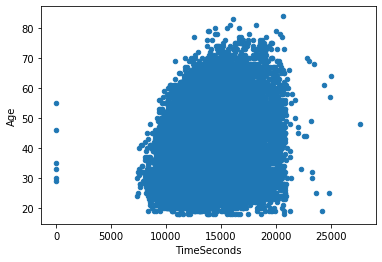

In [4]:
"""2. Wyświetl wykres punktowy prezentujący zależność wieku (kolumna Age) od czasu potrzebnego do
przebiegnięcia maratonu (kolumna TotalSeconds)"""

marathon.plot.scatter(x='TimeSeconds',y='Age')

In [16]:
"""3. Korzystając z data frame marathon utwórz dwa nowe obiekty data frame: marathon_m z wynikami
mężczyzn (w kolumnie M/F znajduje się wartość M) oraz marathin_w z wynikami kobiet (w kolumnie M/F
znajduje się F)"""

marathon_all = marathon['M/F'] == 'M'
marathon_m = marathon[marathon_all]
marathon_m.head()

,Age,M/F,Country,40K,TimeSeconds
0,24,M,KEN,2:02:53,7373.0
1,30,M,USA,2:03:14,7394.0
2,25,M,JPN,2:03:38,7418.0
3,32,M,USA,2:04:35,7475.0
4,31,M,KEN,2:05:00,7500.0


In [17]:
marathon_w = marathon[~marathon_all]
marathon_w.head()

,Age,M/F,Country,40K,TimeSeconds
20,37,F,KEN,2:14:43,8083.0
23,27,F,BRN,2:15:42,8142.0
24,25,F,USA,2:15:54,8154.0
33,33,F,USA,2:17:25,8245.0
43,33,F,KEN,2:19:07,8347.0


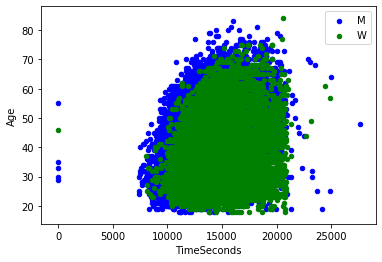

In [18]:
'''4. Korzystając z data frame marathon_m i marathon_w utwórz wykres punktowy nakładając na wyniki
mężczyzn wyniki kobiet. Odpowiedz na pytanie "czy wśród osób po 70-ce chętniej biegają panowie czy
panie"'''

b = marathon_m.plot.scatter(x='TimeSeconds',y='Age',color='Blue',label='M')
marathon_w.plot.scatter(x='TimeSeconds',y='Age',color='Green',label='W', ax=b)

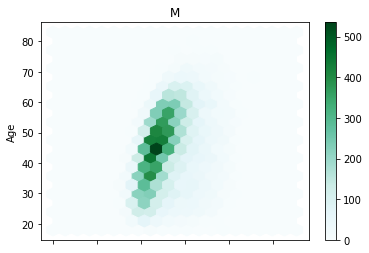

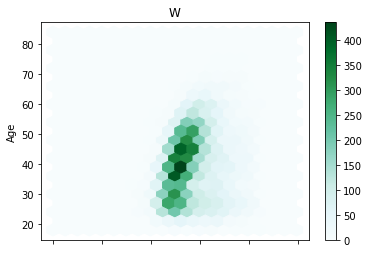

In [21]:
"""5. Korzystając z data frame marathon_m i marathon_w utwórz dwa oddzielne wykresy typu hexbin.
Poeksperymentuj z parametrem gridsize"""

marathon_m.plot.hexbin(x='TimeSeconds',y='Age',gridsize=20,title='M')
marathon_w.plot.hexbin(x='TimeSeconds',y='Age',gridsize=20,title='W')

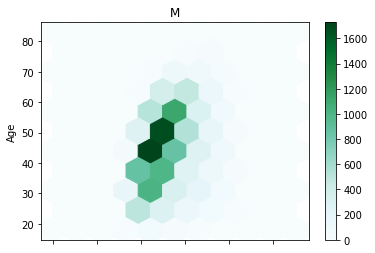

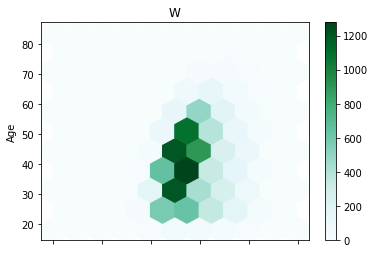

In [22]:
marathon_m.plot.hexbin(x='TimeSeconds',y='Age',gridsize=10,title='M')
marathon_w.plot.hexbin(x='TimeSeconds',y='Age',gridsize=10,title='W')

In [26]:
"""6. Wykonaj poniższe polecenia importujące dane do kolejnego wykresu:
 import datetime
 #Import data
 nasa = pd.read_csv("nasa_facebook_statuses.csv",
 usecols=["status_published","num_likes"])
 #Convert column type to date time
 nasa["status_published"] = pd.to_datetime(nasa["status_published"])
 #Select observations between two datetimes - May 2015
 filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_publis
hed'] < '2016-6-1')
 nasa = nasa[filter]
 #Add column with day only
 nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1
)
 #Group all columns by sum
 nasa_by_day = nasa.groupby(by='day').sum()
 #Import data
 bean = pd.read_csv("mrbean_facebook_statuses.csv",
 usecols=["status_published","num_likes"])
 #Convert column type to date time
 bean["status_published"] = pd.to_datetime(bean["status_published"])
 #Select observations between two datetimes - May 2015
 filter =(bean['status_published'] >= '2016-5-1') & (bean['status_publis
hed'] < '2016-6-1')"""

import datetime

#Import data
nasa = pd.read_csv("/Users/kamilw/Desktop/Moje/PythonLearing/Pandas_Udemy/course-files/nasa_facebook_statuses.csv",
                   usecols=["status_published","num_likes"])

#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])

#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-5-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]

#Add column with day only
nasa['day'] = nasa.apply(lambda row: row["status_published"].day,axis=1)

#Group all columns by sum
nasa_by_day = nasa.groupby(by='day').sum()

#Import data
bean = pd.read_csv("/Users/kamilw/Desktop/Moje/PythonLearing/Pandas_Udemy/course-files/mrbean_facebook_statuses.csv",
                   usecols=["status_published","num_likes"])

#Convert column type to date time
bean["status_published"] = pd.to_datetime(bean["status_published"])

#Select observations between two datetimes - May 2015
filter =(bean['status_published'] >= '2016-5-1') & (bean['status_published'] < '2016-6-1')
bean = bean[filter]

#Add column with day only
bean['day'] = bean.apply(lambda row: row["status_published"].day,axis=1)

#Group all columns by sum
bean_by_day = bean.groupby(by='day').sum()

days = nasa["day"].append(bean["day"])
days = days.unique()
fb = pd.DataFrame(index=days).sort_index()

fb['nasa'] = nasa_by_day["num_likes"]
fb['bean'] = bean_by_day["num_likes"]
fb.fillna(value=0, inplace=True)

fb.head()

,nasa,bean
1,60243,0.0
2,177989,0.0
3,50264,0.0
4,133302,26821.0
5,89657,0.0


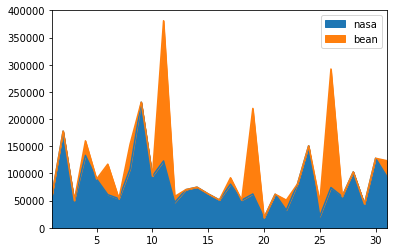

In [27]:
fb.plot(kind='area')